<a href="https://colab.research.google.com/github/roshkjr/DeepLearning/blob/main/fashion_mnist_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install torchmetrics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 927.3/927.3 kB 16.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 82.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 63.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 46.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 14.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 67.2 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstall

In [80]:
import torch
from torch import nn

import torchvision
from torchvision import datasets
from torchvision.transforms import ToTensor
from torchmetrics.classification import Accuracy
from torch.utils.data import Subset, DataLoader
from torch.utils.tensorboard import SummaryWriter
from sklearn.model_selection import train_test_split

from tqdm import tqdm
import matplotlib.pyplot as plt

In [3]:
help(datasets.FashionMNIST)

Help on class FashionMNIST in module torchvision.datasets.mnist:

class FashionMNIST(MNIST)
 |  FashionMNIST(root: Union[str, pathlib.Path], train: bool = True, transform: Optional[Callable] = None, target_transform: Optional[Callable] = None, download: bool = False) -> None
 |  
 |  `Fashion-MNIST <https://github.com/zalandoresearch/fashion-mnist>`_ Dataset.
 |  
 |  Args:
 |      root (str or ``pathlib.Path``): Root directory of dataset where ``FashionMNIST/raw/train-images-idx3-ubyte``
 |          and  ``FashionMNIST/raw/t10k-images-idx3-ubyte`` exist.
 |      train (bool, optional): If True, creates dataset from ``train-images-idx3-ubyte``,
 |          otherwise from ``t10k-images-idx3-ubyte``.
 |      download (bool, optional): If True, downloads the dataset from the internet and
 |          puts it in root directory. If dataset is already downloaded, it is not
 |          downloaded again.
 |      transform (callable, optional): A function/transform that  takes in a PIL image
 | 

In [18]:
train_data = datasets.FashionMNIST(
   root="data",
   train = True,
   download = True,
   transform = ToTensor(),
   target_transform = None

)

In [5]:
train_data

Dataset FashionMNIST
    Number of datapoints: 60000
    Root location: data
    Split: Train
    StandardTransform
Transform: ToTensor()

In [6]:
image, label = train_data[0][0], train_data[0][1]

In [7]:
image.shape

torch.Size([1, 28, 28])

In [ ]:
label

9

In [ ]:
train_data.classes

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

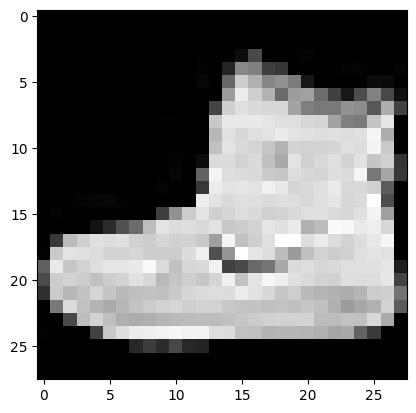

In [ ]:
plt.imshow(image.squeeze(), cmap="grey")

In [ ]:
class_count = {i: 0 for i in range(10)}

In [ ]:
for i in range(len(train_data)):
  class_count[train_data[i][1]] += 1

In [ ]:
class_count

{0: 6000,
 1: 6000,
 2: 6000,
 3: 6000,
 4: 6000,
 5: 6000,
 6: 6000,
 7: 6000,
 8: 6000,
 9: 6000}

In [8]:
test_data = datasets.FashionMNIST(
    root = "data",
    train = False,
    download = True,
    transform = ToTensor(),
    target_transform = None
)

In [ ]:
test_data

Dataset FashionMNIST
    Number of datapoints: 10000
    Root location: data
    Split: Test
    StandardTransform
Transform: ToTensor()

In [9]:
# Make device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"

# Set manual seed since nn.Parameter are randomly initialized
torch.manual_seed(42)

In [45]:
import numpy as np

In [48]:
10000/60000

0.16666666666666666

In [47]:
len(train_data.targets)

60000

In [49]:
train_data_mini_indices, test_data_mini_indices = train_test_split(np.arange(len(train_data)), train_size = 0.16, random_state=32, shuffle=True, stratify=train_data.targets)
train_data_mini = Subset(train_data, indices=train_data_mini_indices)

In [58]:
class_count = {i: 0 for i in range(10)}
for i in range(len(train_data_mini)):
  class_count[train_data_mini[i][1]] += 1

In [59]:
class_count

{0: 960,
 1: 960,
 2: 960,
 3: 960,
 4: 960,
 5: 960,
 6: 960,
 7: 960,
 8: 960,
 9: 960}

In [61]:
BATCH_SIZE = 32

train_data_loader = DataLoader(
    train_data_mini,
    batch_size = BATCH_SIZE,
    shuffle=True
)

test_data_loader = DataLoader(
    test_data,
    batch_size =1,
    shuffle=False
)

In [63]:
len(train_data_loader)

300

In [64]:
len(test_data_loader)

10000

In [100]:
def train_step(model, loss_fn, optimizer, device, data_loader, accuracy_fn):

  model.to(device)
  model.train()
  train_loss, train_accuracy = 0, 0
  for (X,y) in data_loader:
    X, y = X.to(device), y.to(device)

    y_pred = model(X)

    loss = loss_fn(y_pred, y)
    train_loss += loss
    train_accuracy += accuracy_fn(y_pred, y)

    optimizer.zero_grad()

    loss.backward()

    optimizer.step()

  train_loss /= len(data_loader)
  train_accuracy /= len(data_loader)

  return (train_loss, train_accuracy)



In [101]:
def test_step(model, data_loader, accuracy_fn):

  model.eval()
  with torch.inference_mode():
    for (X,y) in data_loader:
      X, y = X.to(device), y.to(device)

      y_pred = model(X)
      test_accuracy = accuracy_fn(y_pred, y)


    test_accuracy /= len(data_loader)


  return test_accuracy




In [89]:
class BaseModel(nn.Module):

  def __init__(self, input_dim, hidden_dim, output_dim):
    super().__init__()
    self.block = nn.Sequential(
        nn.Flatten(),
        nn.Linear(input_dim, hidden_dim),
        nn.ReLU(),
        nn.BatchNorm1d(hidden_dim),
        nn.Linear(hidden_dim, output_dim),
        nn.Softmax(dim=1)
    )

  def forward(self, x):
    return self.block(x)


In [98]:
def train_model(model,
                loss_fn,
                epochs,
                train_data_loader,
                test_data_loader,
                optimizer,
                device,
                accuracy_fn,
                writer):
  for epoch in tqdm(range(epochs)):
    train_loss, train_accuracy = train_step(model, loss_fn, optimizer, device, train_data_loader, accuracy_fn)

    writer.add_scalar("train_loss",
                      train_loss,
                      epoch)
    writer.add_scalar("train_accuracy",
                      train_accuracy,
                      epoch)
    test_accuracy = test_step(model, test_data_loader, accuracy_fn)
    writer.add_scalar("test_accuracy",
                      test_accuracy,
                      epoch)


In [74]:
train_data_mini[0][0].shape

torch.Size([1, 28, 28])

In [76]:
28*28

784

In [105]:
loss_fn = nn.CrossEntropyLoss()
accuracy_fn = Accuracy(task="multiclass", num_classes=len(train_data.classes)).to(device)

In [1]:
model_0 = BaseModel(784, 500, 10)
EPOCHS = 10
LR = 3e-4
model_0_optimizer = torch.optim.Adam(model_0.parameters(), lr = LR)
writer = SummaryWriter(f"fashion_mnist/base_model")
train_model(model_0,loss_fn, EPOCHS,train_data_loader, test_data_loader, model_0_optimizer, device, accuracy_fn, writer)

NameError: name 'BaseModel' is not defined